In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/used_car_price/train_set_label.csv")

In [3]:
df.head()

,region,region_url,year,manufacturer,model_name,car_condition,#cylinders,fuel_type,odometer,title_status,...,size,car_type,car_color,image_url,car_description,county,state,latitude,longitude,price_of_car
0,san antonio,https://sanantonio.craigslist.org,2018.0,honda,accord ex-l,NaN,NaN,gas,NaN,clean,...,NaN,NaN,NaN,https://images.craigslist.org/00W0W_jPnECYbxWm...,"Price: $24,900 Miles: 31,269 Engine: 1.5L Turb...",NaN,tx,29.5407,-98.5521,24900
1,augusta,https://augusta.craigslist.org,2006.0,ford,f250 super duty diesel,excellent,NaN,diesel,169438.0,clean,...,full-size,truck,white,https://images.craigslist.org/00U0U_5ROtvUdu72...,2006 Ford F250 Lariat SuperDuty Crew Cab 4 doo...,NaN,ga,33.5161,-82.0785,0
2,hickory / lenoir,https://hickory.craigslist.org,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,4500
3,fargo / moorhead,https://fargo.craigslist.org,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,mn,NaN,NaN,20000
4,los angeles,https://losangeles.craigslist.org,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ca,NaN,NaN,0


<AxesSubplot:>

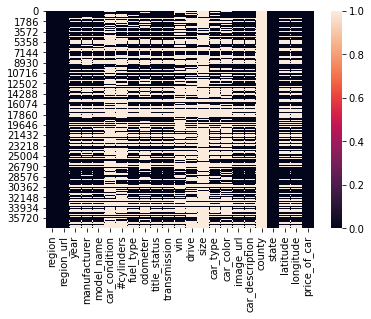

In [178]:
sns.heatmap(df.isnull())

In [179]:
df.shape

(37500, 23)

In [180]:
df.isnull().sum()

region                 0
region_url             0
year               15975
manufacturer       16896
model_name         16174
car_condition      26360
#cylinders         24668
fuel_type          16091
odometer           19929
title_status       16032
transmission       15997
vin                25480
drive              22558
size               30952
car_type           21326
car_color          23122
image_url          15899
car_description    15899
county             37500
state                  0
latitude           16268
longitude          16268
price_of_car           0
dtype: int64

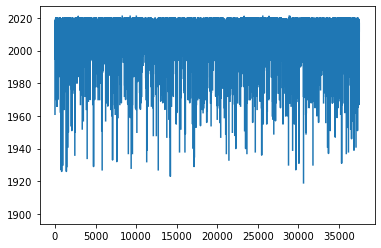

In [181]:
plt.plot(df['year'])

In [182]:
df['year'].fillna(int(df['year'].mean()),inplace=True)

In [183]:
df['car_condition'].value_counts()

excellent    5489
good         3851
like new     1252
fair          393
new           124
salvage        31
Name: car_condition, dtype: int64

In [184]:
df['car_condition'].fillna("fair",inplace=True)

In [185]:
df['#cylinders'].value_counts()

4 cylinders     4637
6 cylinders     4558
8 cylinders     3391
5 cylinders      119
10 cylinders      43
other             37
3 cylinders       36
12 cylinders      11
Name: #cylinders, dtype: int64

In [186]:
df['#cylinders'].fillna("4 cylinders",inplace=True)

In [187]:
df['fuel_type'].value_counts()

gas         18793
diesel       1633
other         682
hybrid        241
electric       60
Name: fuel_type, dtype: int64

In [188]:
df['fuel_type'].fillna("gas",inplace=True)

In [189]:
df['odometer'].value_counts()

0.0         148
150000.0     48
130000.0     46
110000.0     41
170000.0     38
           ... 
70507.0       1
2075.0        1
35253.0       1
21570.0       1
133723.0      1
Name: odometer, Length: 11952, dtype: int64

In [190]:
df['odometer'].fillna(df['odometer'].mean(),inplace=True)

In [191]:
df['title_status'].value_counts()

clean         20699
rebuilt         399
salvage         214
lien            103
missing          42
parts only       11
Name: title_status, dtype: int64

In [192]:
df['title_status'].fillna("clean",inplace=True)

In [193]:
df['transmission'].value_counts()

automatic    19231
manual        1557
other          715
Name: transmission, dtype: int64

In [194]:
df['transmission'].fillna("automatic",inplace=True)

In [195]:
df['drive'].value_counts()

4wd    6280
fwd    5966
rwd    2696
Name: drive, dtype: int64

In [196]:
df['drive'].fillna("na",inplace=True)

In [197]:
df['size'].value_counts()

full-size      3306
mid-size       1905
compact        1140
sub-compact     197
Name: size, dtype: int64

In [198]:
df['size'].fillna("full-size",inplace=True)

In [199]:
df['car_color'].value_counts()

white     3813
black     2954
silver    2151
blue      1388
red       1380
grey      1367
custom     433
green      351
brown      281
yellow     122
orange      92
purple      46
Name: car_color, dtype: int64

In [200]:
df['car_color'].fillna("na",inplace=True)

In [201]:
df['car_type'].value_counts()

sedan          4367
SUV            4263
truck          1862
pickup         1659
coupe           906
other           727
hatchback       601
wagon           556
van             460
convertible     389
mini-van        326
bus              32
offroad          26
Name: car_type, dtype: int64

In [202]:
df['car_type'].fillna("na",inplace=True)

In [203]:
df['image_url'].fillna("na",inplace=True)

In [204]:
df['image_url'][3] == 'na'

True

In [205]:
def img(x):
    if x=='na':
        return(0)
    else:
        return(1)
    
df['image_url'] = df['image_url'].apply(img)

In [206]:
df['image_url'].value_counts()

1    21601
0    15899
Name: image_url, dtype: int64

In [207]:
df.corr()['price_of_car']

year            0.019060
odometer       -0.026650
image_url       0.007698
county               NaN
latitude       -0.011009
longitude      -0.007337
price_of_car    1.000000
Name: price_of_car, dtype: float64

In [208]:
df.isnull().sum()

region                 0
region_url             0
year                   0
manufacturer       16896
model_name         16174
car_condition          0
#cylinders             0
fuel_type              0
odometer               0
title_status           0
transmission           0
vin                25480
drive                  0
size                   0
car_type               0
car_color              0
image_url              0
car_description    15899
county             37500
state                  0
latitude           16268
longitude          16268
price_of_car           0
dtype: int64

In [209]:
'''
car_desc
county
vin
manufacturer       
model_name
lat 
lon
'''

'\ncar_desc\ncounty\nvin\nmanufacturer       \nmodel_name\nlat \nlon\n'

In [210]:
df.columns

Index(['region', 'region_url', 'year', 'manufacturer', 'model_name',
       'car_condition', '#cylinders', 'fuel_type', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'car_type', 'car_color',
       'image_url', 'car_description', 'county', 'state', 'latitude',
       'longitude', 'price_of_car'],
      dtype='object')

In [273]:
new_df = df.drop(['region','region_url','car_description','county','vin','manufacturer','model_name','latitude','longitude'],axis=1)

In [274]:
new_df.head()

,year,car_condition,#cylinders,fuel_type,odometer,title_status,transmission,drive,size,car_type,car_color,image_url,state,price_of_car
0,2018.0,fair,4 cylinders,gas,97285.695692,clean,automatic,na,full-size,na,na,1,tx,24900
1,2006.0,excellent,4 cylinders,diesel,169438.000000,clean,automatic,rwd,full-size,truck,white,1,ga,0
2,2010.0,fair,4 cylinders,gas,97285.695692,clean,automatic,na,full-size,na,na,0,nc,4500
3,2010.0,fair,4 cylinders,gas,97285.695692,clean,automatic,na,full-size,na,na,0,mn,20000
4,2010.0,fair,4 cylinders,gas,97285.695692,clean,automatic,na,full-size,na,na,0,ca,0


In [275]:
d = []
d.append(pd.get_dummies(df['car_condition'],drop_first=True))
d.append(pd.get_dummies(df['#cylinders'],drop_first=True))
d.append(pd.get_dummies(df['fuel_type'],drop_first=True))
d.append(pd.get_dummies(df['title_status'],drop_first=True))
d.append(pd.get_dummies(df['transmission'],drop_first=True))
d.append(pd.get_dummies(df['drive'],drop_first=True))
d.append(pd.get_dummies(df['size'],drop_first=True))
d.append(pd.get_dummies(df['state'],drop_first=True))
d.append(pd.get_dummies(df['car_type'],drop_first=True))
d.append(pd.get_dummies(df['car_color'],drop_first=True))

In [276]:
new_df = new_df.drop(['car_condition','#cylinders','fuel_type','title_status','transmission','drive','size','state','car_type','car_color'],axis=1)

In [277]:
f_df = pd.concat( [new_df,d[0],d[1],d[2],d[3],d[4],d[5],d[6],d[7],d[8],d[9]],axis=1)

In [278]:
from sklearn.model_selection import train_test_split

In [279]:
X = f_df.drop('price_of_car',axis=1)
y = f_df['price_of_car']

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [281]:
from sklearn.ensemble import RandomForestRegressor

In [282]:
f_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 95 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          37500 non-null  float64
 1   odometer      37500 non-null  float64
 2   image_url     37500 non-null  int64  
 3   price_of_car  37500 non-null  int64  
 4   fair          37500 non-null  uint8  
 5   good          37500 non-null  uint8  
 6   like new      37500 non-null  uint8  
 7   new           37500 non-null  uint8  
 8   salvage       37500 non-null  uint8  
 9   12 cylinders  37500 non-null  uint8  
 10  3 cylinders   37500 non-null  uint8  
 11  4 cylinders   37500 non-null  uint8  
 12  5 cylinders   37500 non-null  uint8  
 13  6 cylinders   37500 non-null  uint8  
 14  8 cylinders   37500 non-null  uint8  
 15  other         37500 non-null  uint8  
 16  electric      37500 non-null  uint8  
 17  gas           37500 non-null  uint8  
 18  hybrid        37500 non-nu

In [283]:
model = RandomForestRegressor(100)

In [284]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [285]:
pred = model.predict(X_test)

In [286]:
from sklearn.metrics import mean_absolute_error

In [287]:
print(pow(mean_absolute_error(y_test,pred),0.5))

97.88303008561978


In [288]:
y_test

16618    10995
1075     28895
27082    36988
25151    18500
26216    23995
         ...  
12541     7700
9760     27590
1752      5500
652      16950
28277     8998
Name: price_of_car, Length: 12375, dtype: int64

In [289]:
pred

array([ 6224.06666667, 29759.32      , 15095.98421766, ...,
        6413.4       , 15481.32      , 17895.57799655])

<AxesSubplot:xlabel='price_of_car'>

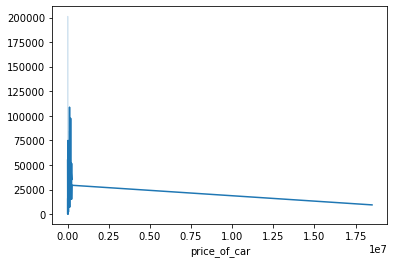

In [290]:
sns.lineplot(x=y_test,y=pred)

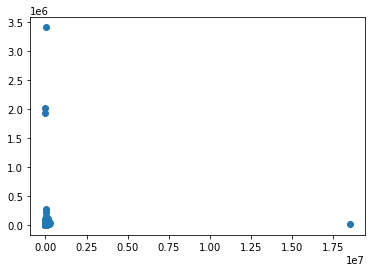

In [298]:
plt.scatter(y_test,pred )

In [299]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/used_car_price/test_set_label.csv')

In [300]:
df = test_data

In [301]:
df['year'].fillna(int(df['year'].mean()),inplace=True)

In [302]:
df['car_condition'].value_counts()

excellent    1858
good         1329
like new      438
fair          158
new            32
salvage        11
Name: car_condition, dtype: int64

In [303]:
df['car_condition'].fillna("fair",inplace=True)

In [304]:
df['#cylinders'].value_counts()

4 cylinders     1602
6 cylinders     1494
8 cylinders     1179
5 cylinders       38
10 cylinders      17
3 cylinders       11
other             11
12 cylinders       4
Name: #cylinders, dtype: int64

In [305]:
df['#cylinders'].fillna("4 cylinders",inplace=True)

In [306]:
df['fuel_type'].value_counts()

gas         6386
diesel       535
other        264
hybrid        86
electric      15
Name: fuel_type, dtype: int64

In [307]:
df['fuel_type'].fillna("gas",inplace=True)

In [308]:
df['odometer'].value_counts()

0.0          51
150000.0     17
170000.0     15
1.0          15
110000.0     15
             ..
52338.0       1
1430000.0     1
95209.0       1
35471.0       1
122.0         1
Name: odometer, Length: 4709, dtype: int64

In [309]:
df['odometer'].fillna(df['odometer'].mean(),inplace=True)

In [310]:
df['title_status'].value_counts()

clean         7046
rebuilt        145
salvage         60
lien            39
missing         16
parts only       3
Name: title_status, dtype: int64

In [311]:
df['title_status'].fillna("clean",inplace=True)

In [312]:
df['transmission'].value_counts()

automatic    6554
manual        513
other         260
Name: transmission, dtype: int64

In [313]:
df['transmission'].fillna("automatic",inplace=True)

In [314]:
df['drive'].value_counts()

4wd    2194
fwd    2043
rwd     926
Name: drive, dtype: int64

In [315]:
df['drive'].fillna("na",inplace=True)

In [316]:
df['size'].value_counts()

full-size      1149
mid-size        609
compact         401
sub-compact      67
Name: size, dtype: int64

In [317]:
df['size'].fillna("full-size",inplace=True)

In [318]:
df['car_color'].value_counts()

white     1258
black     1006
silver     729
blue       488
grey       467
red        450
custom     141
green      139
brown       97
yellow      39
orange      35
purple      16
Name: car_color, dtype: int64

In [319]:
df['car_color'].fillna("na",inplace=True)

In [320]:
df['car_type'].value_counts()

sedan          1518
SUV            1462
truck           612
pickup          552
coupe           298
other           215
wagon           208
hatchback       196
van             155
convertible     130
mini-van        118
offroad          15
bus               4
Name: car_type, dtype: int64

In [321]:
df['car_type'].fillna("na",inplace=True)

In [322]:
df['image_url'].fillna("na",inplace=True)

In [323]:
df['image_url'][3] == 'na'

True

In [324]:
def img(x):
    if x=='na':
        return(0)
    else:
        return(1)
    
df['image_url'] = df['image_url'].apply(img)

In [325]:
df['image_url'].value_counts()

1    7358
0    5142
Name: image_url, dtype: int64

In [327]:
df.isnull().sum()

region                 0
region_url             0
year                   0
manufacturer        5485
model_name          5240
car_condition          0
#cylinders             0
fuel_type              0
odometer               0
title_status           0
transmission           0
vin                 8367
drive                  0
size                   0
car_type               0
car_color              0
image_url              0
car_description     5142
county             12500
state                  0
latitude            5253
longitude           5253
dtype: int64

In [328]:
new_df = df.drop(['region','region_url','car_description','county','vin','manufacturer','model_name','latitude','longitude'],axis=1)

In [329]:
new_df.head()

,year,car_condition,#cylinders,fuel_type,odometer,title_status,transmission,drive,size,car_type,car_color,image_url,state
0,2018.0,fair,4 cylinders,gas,44721.000000,clean,automatic,4wd,full-size,SUV,silver,1,wa
1,1988.0,good,8 cylinders,gas,98169.886591,clean,manual,rwd,full-size,na,na,1,or
2,2010.0,fair,4 cylinders,gas,98169.886591,clean,automatic,na,full-size,na,na,0,mo
3,2010.0,fair,4 cylinders,gas,98169.886591,clean,automatic,na,full-size,na,na,0,ca
4,2010.0,fair,4 cylinders,gas,98169.886591,clean,automatic,na,full-size,na,na,0,ms


In [330]:
d = []
d.append(pd.get_dummies(df['car_condition'],drop_first=True))
d.append(pd.get_dummies(df['#cylinders'],drop_first=True))
d.append(pd.get_dummies(df['fuel_type'],drop_first=True))
d.append(pd.get_dummies(df['title_status'],drop_first=True))
d.append(pd.get_dummies(df['transmission'],drop_first=True))
d.append(pd.get_dummies(df['drive'],drop_first=True))
d.append(pd.get_dummies(df['size'],drop_first=True))
d.append(pd.get_dummies(df['state'],drop_first=True))
d.append(pd.get_dummies(df['car_type'],drop_first=True))
d.append(pd.get_dummies(df['car_color'],drop_first=True))

In [331]:
new_df = new_df.drop(['car_condition','#cylinders','fuel_type','title_status','transmission','drive','size','state','car_type','car_color'],axis=1)

In [333]:
f_df = pd.concat( [new_df,d[0],d[1],d[2],d[3],d[4],d[5],d[6],d[7],d[8],d[9]],axis=1)

In [334]:
sub = model.predict(f_df)

In [335]:
sub

array([30730.67      ,  6492.94      , 12395.10183793, ...,
       35225.18      , 14159.25653542, 12011.34457121])

In [336]:
sub = pd.DataFrame(sub)

In [338]:
sub.to_csv('submission.csv')